# Pipeline of running CNMF-E 

In [1]:
try:
    get_ipython().magic(u'load_ext autoreload')
    get_ipython().magic(u'autoreload 2')
except:
    print('NOT IPYTHON')

import numpy as np 
import matplotlib.pyplot as plt 
import caiman as cm
import caiman.source_extraction.cnmf as cnmf

## Step 1: Load data 

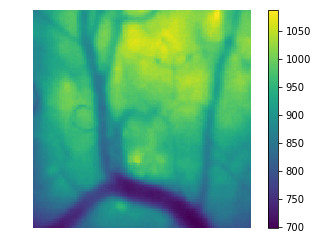

In [2]:
fname = './example_movies/data_endoscope.tif'
Y = cm.load(fname)

# OR load data in GUI mode 
# Y = neuron.ui_get_file()
plt.colorbar(plt.imshow(Y[100,]))
plt.axis('off');

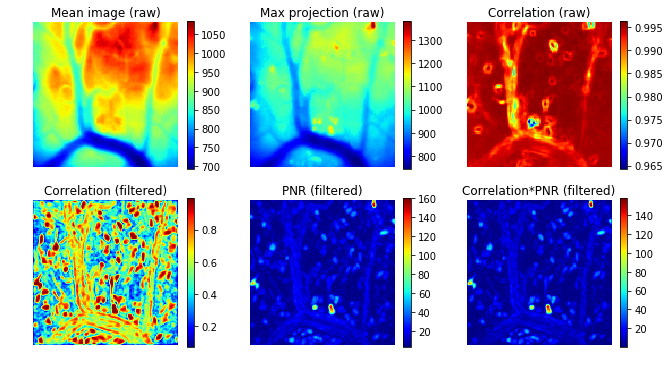

In [3]:
# show correlation image of the raw data; show correlation image and PNR image of the filtered data
cn_raw = cm.summary_images.local_correlation(Y)
cn_filter, pnr, psf = cm.summary_images.correlation_pnr_filtered(Y, gSig=1, gSiz=10, center_psf=True)
plt.figure(figsize=(11, 6))

for i, (data, title) in enumerate(((Y.mean(0), 'Mean image (raw)'),
                                   (Y.max(0), 'Max projection (raw)'),
                                   (cn_raw[1:-1,1:-1], 'Correlation (raw)'),
                                   (cn_filter, 'Correlation (filtered)'),
                                   (pnr, 'PNR (filtered)'),
                                   (cn_filter*pnr, 'Correlation*PNR (filtered)'))):
    plt.subplot(2,3,1+i)
    plt.imshow(data, cmap='jet', aspect='equal')
    plt.axis('off')
    plt.colorbar() 
    plt.title(title);

 # Step 2: run initialization


<IPython.core.display.Javascript object>


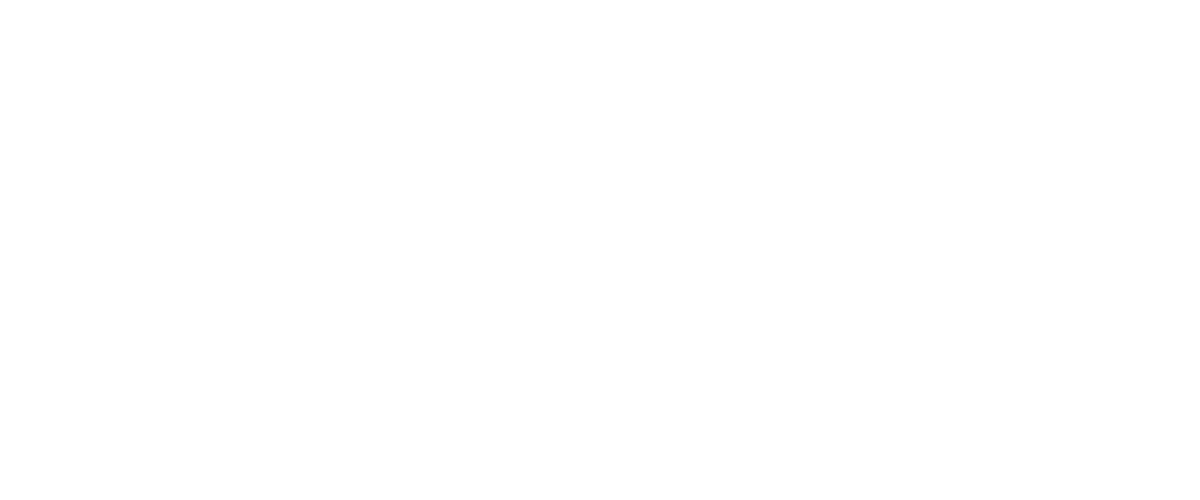

In [4]:
%matplotlib notebook
# pick thresholds 
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(cn_filter, cmap='jet')
plt.title('correlation image')
plt.colorbar()
plt.subplot(122)
plt.imshow(pnr, cmap='jet')
plt.title('PNR')
plt.colorbar();

# 'min_corr=0.85', 'min_pnr=20'

In [5]:
results = cnmf.initialization.greedyROI_corr(Y.transpose(1,2,0), g_size=10, g_sig=3, center_psf=True, 
                                             min_corr=0.85, min_pnr=20, ring_model=True, nb=10)

0 neurons have been initialized
10 neurons have been initialized
20 neurons have been initialized
30 neurons have been initialized
40 neurons have been initialized
50 neurons have been initialized
60 neurons have been initialized
70 neurons have been initialized
80 neurons have been initialized
90 neurons have been initialized
100 neurons have been initialized
110 neurons have been initialized
120 neurons have been initialized
In total,  128 neurons were initialized.


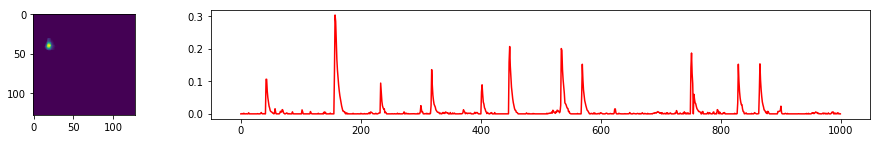

In [6]:
%matplotlib inline
# neurons
for m in range(10,11):
    f, (a0, a1) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[1, 6.5]}, figsize=(15,2))
    a0.imshow(results[0][:,m].reshape(Y.shape[1:],order='F'))
    a1.plot(results[1][m], 'r');

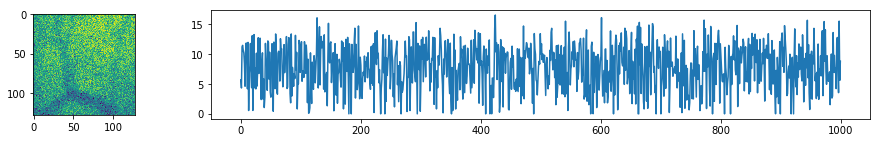

In [7]:
# background components
for m in range(1):
    f, (a0, a1) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[1, 6.5]}, figsize=(15,2))
    a0.imshow(results[3][:,m].reshape(Y.shape[1:],order='F'))
    a1.plot(results[4][m]);